**EXPLOITING THE HOSTS LISTINGS DATA OF AIRBNB USING MACHINE LEARNING TECHNIQUES**

# Phase - 1





**Problem Statement**
*  Develop a predictive model that can accurately estimate the prices of the Airbnb listings in New York city .
*  Our aim is to assist both the customers and the hosts in making better decisions in terms of pricing and accommodation which in turn result in betterment of  both the customer experience and the marketing efficiency .





**Background**


*   Airbnb has gained immense popularity in New York, offering unique hospitality experience at affordable prices.

*   The increasing number of Airbnb listings presents challenges for hosts and guests in understanding pricing dynamics .


*   The predictive price estimation model can help in improving the growth of Airbnb business.
*   By assisting hosts with proper pricing strategies which helps to attract more customers and in turn increases the revenue which also contributes to the tourism industry.





**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the data using pandas library**

In [ ]:
path='/content/drive/MyDrive/AB_NYC_2019.csv'

#data_frame= pd.read_csv('AB_NYC_2019.csv')
data_frame= pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')

In [ ]:
data_frame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
print("Number of rows present in the dataset is {0}".format(data_frame.shape[0]))
print("Number of columns or features present in the dataset is {0}".format(data_frame.shape[1]))

Number of rows present in the dataset is 48895
Number of columns or features present in the dataset is 16


# Data Processing and Cleaning

1.)Renaming the column names

In [ ]:
#Renaming the columns

data_frame.rename(columns={'id':'listing_id','name': 'listing_title','host_id': 'host_id','host_name': 'host_full_name',
'neighbourhood_group': 'region','neighbourhood': 'neighbourhood_area',
'latitude': 'latitude_coordinate',
'longitude': 'longitude_coordinate',
'room_type': 'accommodation_type',
'price': 'accomodation_price',
'minimum_nights': 'min_stay_nights',
'number_of_reviews': 'total_reviews',
'last_review': 'latest_review_date',
'reviews_per_month': 'monthly_review_rate',
'calculated_host_listings_count': 'host_listings_count',
'availability_365': 'days_available'},inplace=True)

In [ ]:
data_frame.columns

Index(['listing_id', 'listing_title', 'host_id', 'host_full_name', 'region',
       'neighbourhood_area', 'latitude_coordinate', 'longitude_coordinate',
       'accommodation_type', 'accomodation_price', 'min_stay_nights',
       'total_reviews', 'latest_review_date', 'monthly_review_rate',
       'host_listings_count', 'days_available'],
      dtype='object')

2.)Data type of data present in each column of the dataset

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            48895 non-null  int64  
 1   listing_title         48879 non-null  object 
 2   host_id               48895 non-null  int64  
 3   host_full_name        48874 non-null  object 
 4   region                48895 non-null  object 
 5   neighbourhood_area    48895 non-null  object 
 6   latitude_coordinate   48895 non-null  float64
 7   longitude_coordinate  48895 non-null  float64
 8   accommodation_type    48895 non-null  object 
 9   accomodation_price    48895 non-null  int64  
 10  min_stay_nights       48895 non-null  int64  
 11  total_reviews         48895 non-null  int64  
 12  latest_review_date    38843 non-null  object 
 13  monthly_review_rate   38843 non-null  float64
 14  host_listings_count   48895 non-null  int64  
 15  days_available     

3.)Count of unique values present in each column of dataset

In [ ]:
data_frame.nunique()

listing_id              48895
listing_title           47905
host_id                 37457
host_full_name          11452
region                      5
neighbourhood_area        221
latitude_coordinate     19048
longitude_coordinate    14718
accommodation_type          3
accomodation_price        674
min_stay_nights           109
total_reviews             394
latest_review_date       1764
monthly_review_rate       937
host_listings_count        47
days_available            366
dtype: int64

4.)Count of Null values present in each column in the dataset and removing them

In [ ]:
null_counts_value=data_frame.isnull().sum()
print(null_counts_value)

listing_id                  0
listing_title              16
host_id                     0
host_full_name             21
region                      0
neighbourhood_area          0
latitude_coordinate         0
longitude_coordinate        0
accommodation_type          0
accomodation_price          0
min_stay_nights             0
total_reviews               0
latest_review_date      10052
monthly_review_rate     10052
host_listings_count         0
days_available              0
dtype: int64


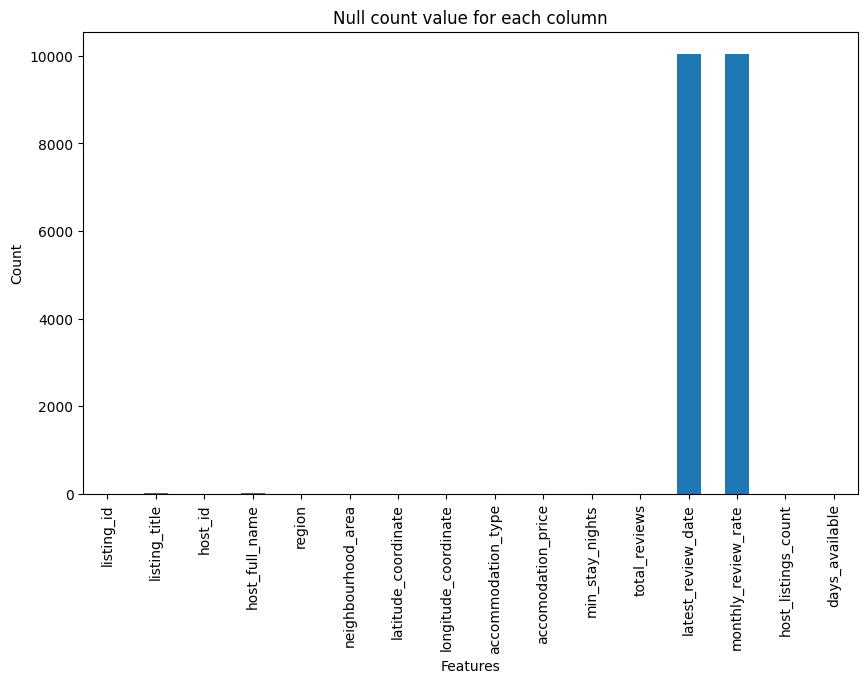

In [ ]:
plt.figure(figsize=(10,6))
null_counts_value.plot(kind='bar')
plt.title('Null count value for each column')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

Treatment of Null values

In [ ]:
# replacing the null values with 0 of monthly review rate
data_frame['monthly_review_rate'] = data_frame.monthly_review_rate.fillna(0)
data_frame['listing_title'] = data_frame.listing_title.fillna("Unspecified")
data_frame['host_full_name'] = data_frame.host_full_name.fillna("Unspecified")

5.)Statistics summary each numeric column present in the dataset

In [ ]:
data_frame.describe()

,listing_id,host_id,latitude_coordinate,longitude_coordinate,accomodation_price,min_stay_nights,total_reviews,monthly_review_rate,host_listings_count,days_available
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From the above statistics of the data, the rows whose accomodation price is equal to 0 seems to be invalid rows or anamolies present in the dataset.

In [ ]:
price_zero_data=data_frame[data_frame['accomodation_price']==0]
print("Number of listings whose price is zero are:{0}".format(len(price_zero_data)))

Number of listings whose price is zero are:11


6.)Counting the duplicates present in the dataset

In [ ]:
# to find the duplicated data
duplicated_data=data_frame[data_frame.duplicated()]
print("Number of duplicate values present in the dataset is {0}".format(len(duplicated_data)))

Number of duplicate values present in the dataset is 0


7.)Number of listings present in each room type

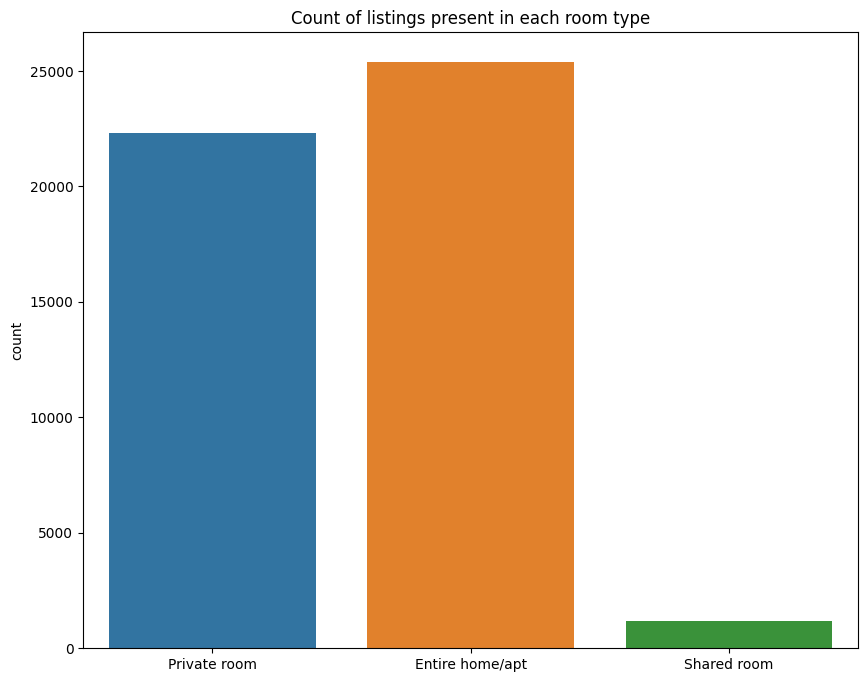

In [ ]:
roomtype_count={"Private room":0,"Entire home/apt":0,"Shared room":0}
for i in range(len(data_frame)):
  roomtype_count[data_frame.iloc[i]['accommodation_type']]+=1

plt.figure(figsize=(10,8))
sns.barplot(x=list(roomtype_count.keys()),y=list(roomtype_count.values()) )
plt.title('Count of listings present in each room type')
plt.ylabel('count')
plt.show()



*   we can observe that shared room are few compared to private rooms and entire home/apartments, which says that less number of people prefer to accommodate in shared rooms in the New York city.



8.)Number of listings present in each neighbourhood

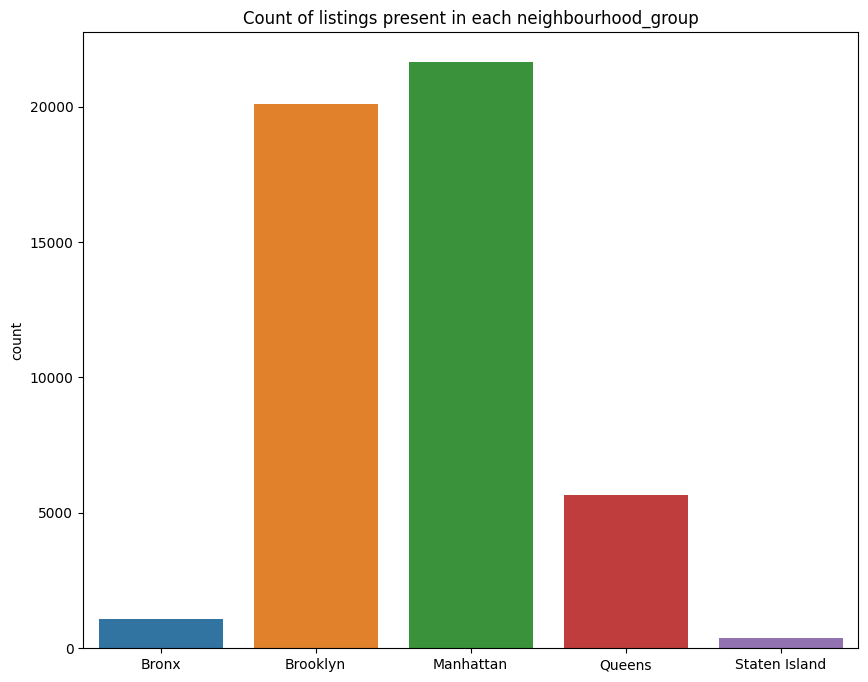

In [ ]:
neighbourhood_count={"Bronx":0,"Brooklyn":0,"Manhattan":0,"Queens":0,"Staten Island":0}
for i in range(len(data_frame)):
  neighbourhood_count[data_frame.iloc[i]['region']]+=1

plt.figure(figsize=(10,8))
sns.barplot(x=list(neighbourhood_count.keys()),y=list(neighbourhood_count.values()))
plt.title('Count of listings present in each neighbourhood_group')
plt.ylabel('count')
plt.show()




*   
The above bar plot indicates that more no of listings present in the Manhattan neighbourhood where as lesser number of listings are in Statten island region. Brooklyn region has little less listing compared to listings in Manhattan.
*   
From this we can say that more customers need accomodation in Brooklyn and Manhattan regions when compared to that of Bronx, Staten Island, Queens area.

*   It could be because of the reason that Manhattan and Brooklyn are high densed areas and also popular tourism places in the New York.

*   Staten Island has very few listings comparatively because of the probable reason that it has low density and not a favourite spot for tourism.



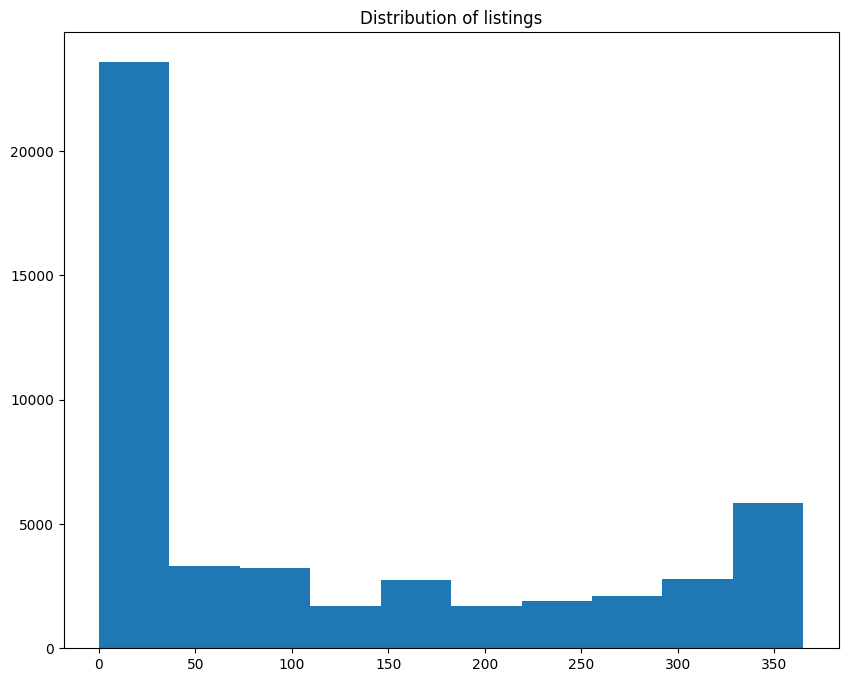

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data_frame['days_available'])
plt.title('Distribution of listings')
plt.show()


*   The above graph illustrate that over 20000 listings fall in the range of 0-50 available days in the year 2019



9.)Loaction distribution of the listings based on lattitude and longitude











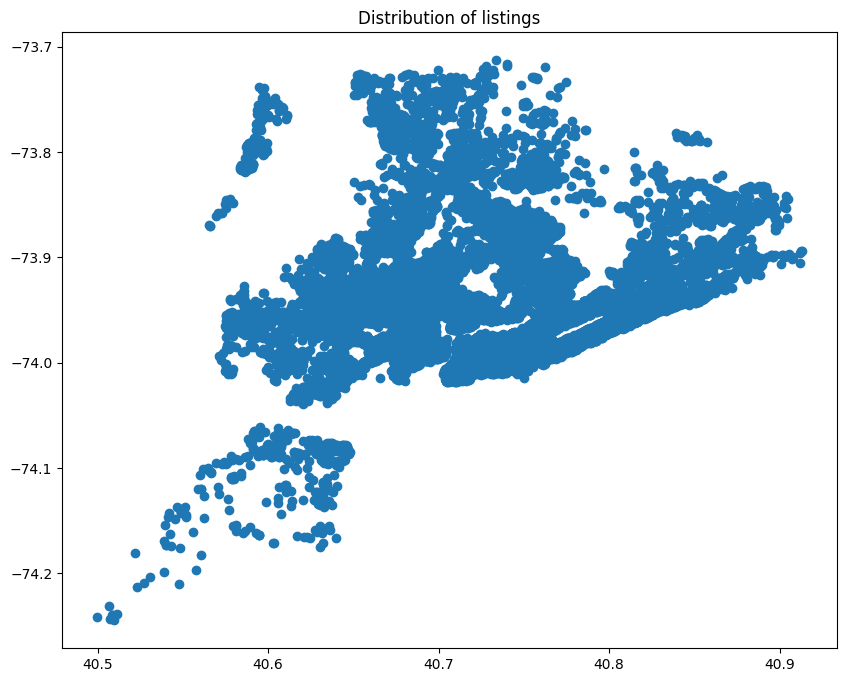

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=data_frame['latitude_coordinate'],y=data_frame['longitude_coordinate'])
plt.title('Distribution of listings')
plt.show()




*  As more no of listings present in the Manhattan and Brooklyn regions the dense area in the graph represents those regions where as the sparse area represent Staten Island or Bronx regions.



10.)Box plots on numerical data to find the outliers

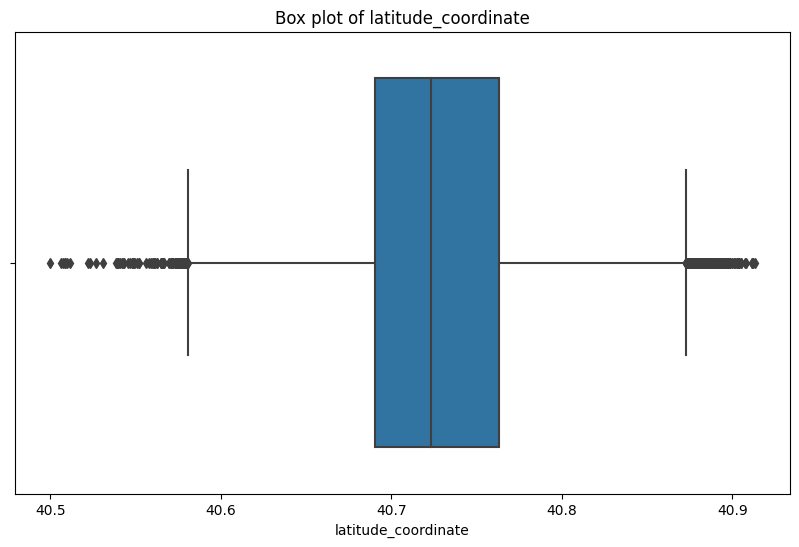

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['latitude_coordinate'],)
plt.title('Box plot of latitude_coordinate')
plt.show()

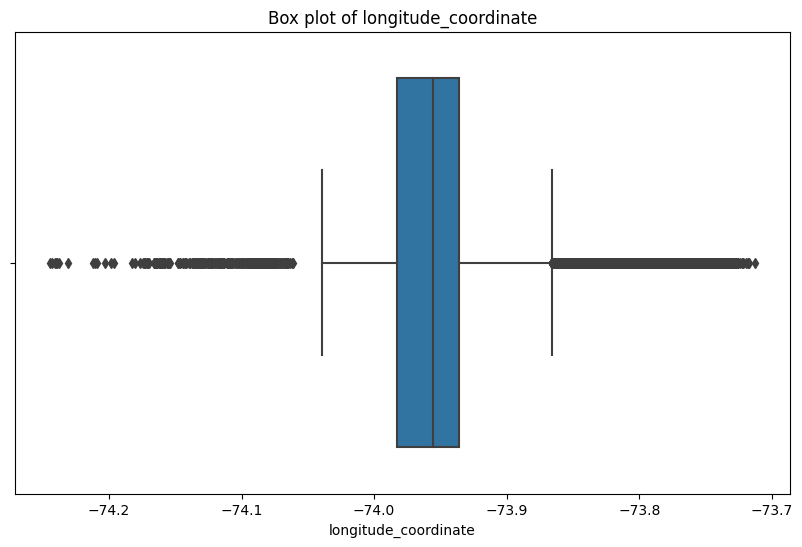

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['longitude_coordinate'],)
plt.title('Box plot of longitude_coordinate')
plt.show()

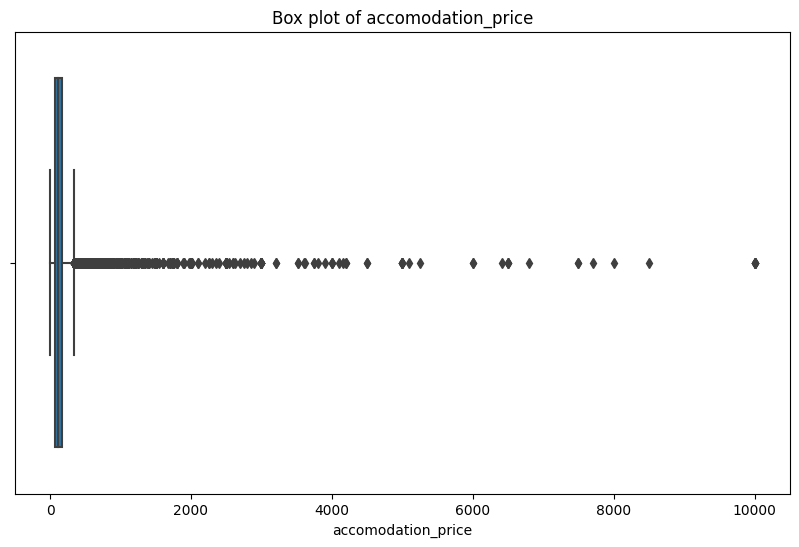

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['accomodation_price'],)
plt.title('Box plot of accomodation_price')
plt.show()

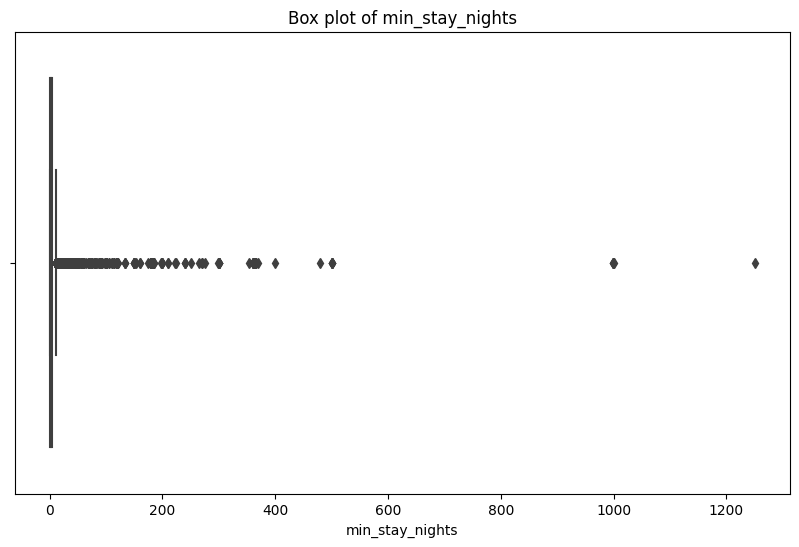

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['min_stay_nights'],)
plt.title('Box plot of min_stay_nights')
plt.show()

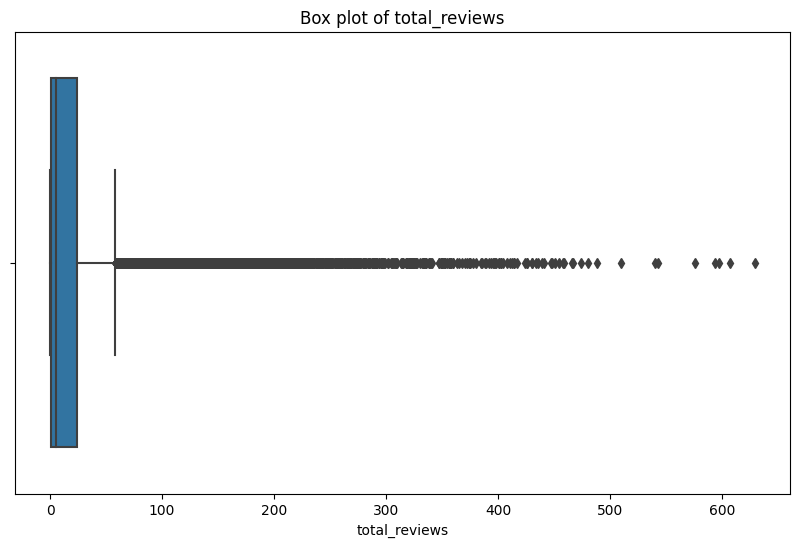

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['total_reviews'],)
plt.title('Box plot of total_reviews')
plt.show()

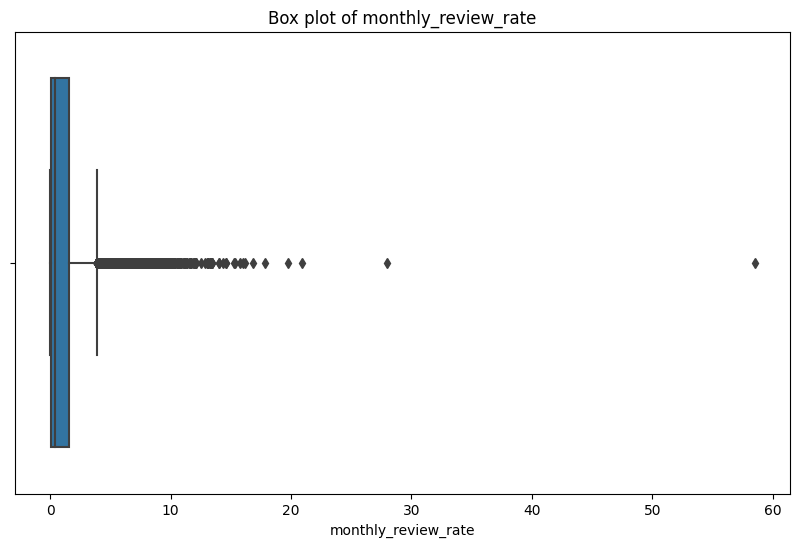

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['monthly_review_rate'],)
plt.title('Box plot of monthly_review_rate')
plt.show()

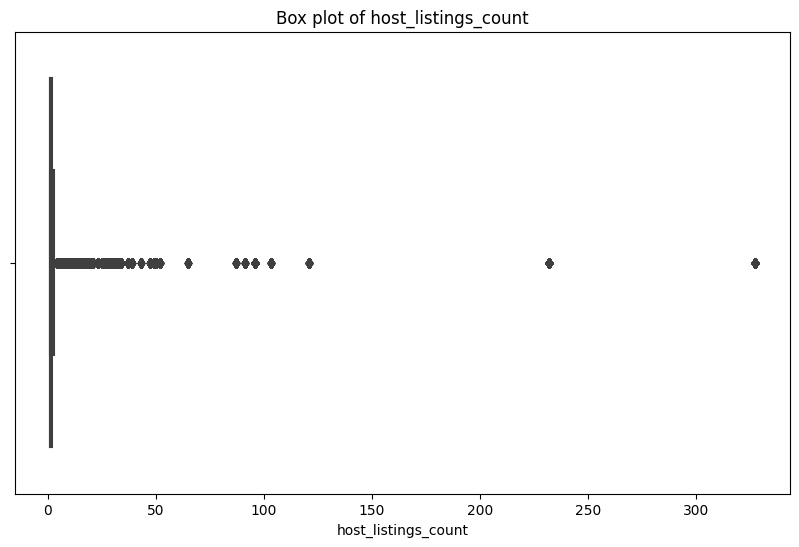

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['host_listings_count'],)
plt.title('Box plot of host_listings_count')
plt.show()

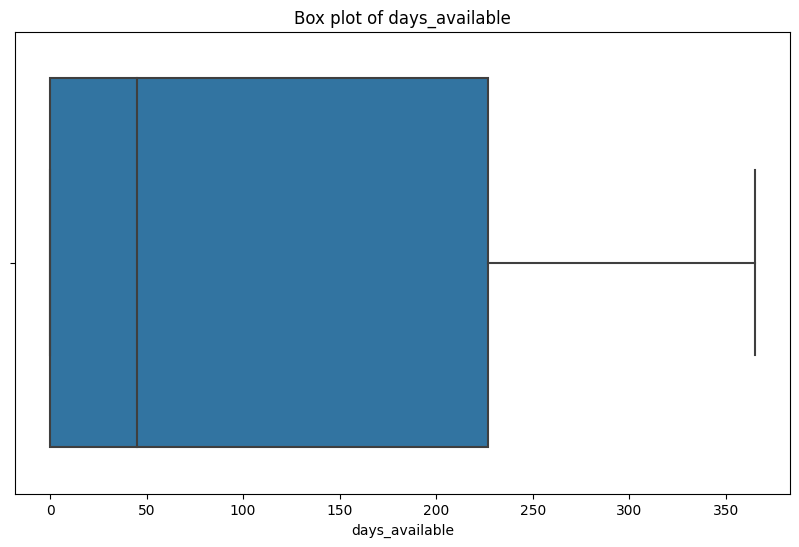

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_frame['days_available'],)
plt.title('Box plot of days_available')
plt.show()

# Phase - 2





# Exploratory Data Analysis

1.Deleting the anamolies in the data(price val=0)

In [ ]:
#Deleting the rows containing price valu equal to 0
condition = data_frame['accomodation_price'] == 0
data_frame=data_frame[~condition]
print("Number of rows present in the dataset is {0}".format(data_frame.shape[0]))
print("Number of columns or features present in the dataset is {0}".format(data_frame.shape[1]))

Number of rows present in the dataset is 48884
Number of columns or features present in the dataset is 16




*   We have 11 records where the price is zero which is an anomaly. It could be because of data corruption as the price of a hotel cannot be zero in the business.
*   To ensure data integrity and maintain the reliability of the analysis, we deleted these rows with zero price anomalies.



2.Correlation Matrix to Summarize Large amount of Data

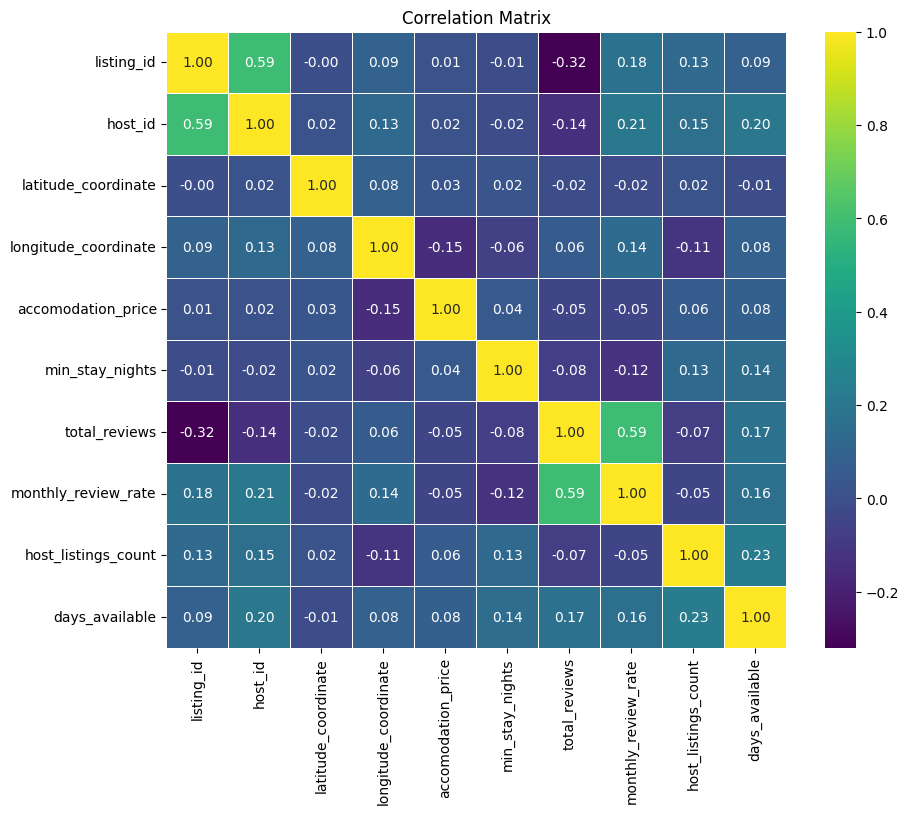

In [ ]:
# Print the correlation matrix
numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation between numeric features
correlation_matrix = data_frame[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



*   we can see a negative correlation between accommodation price and total reviews which suggests that as the number of reviews increases, the price tends to decrease, and vice versa.
*   the correlation between host_listing_count and latitude coordinates is close to zero, indicating no significant relationship between these variables.


*   changes in one variable are not consistently associated with the changes in another variable (not strongly correlated)






3.Analyzing Price based on Region

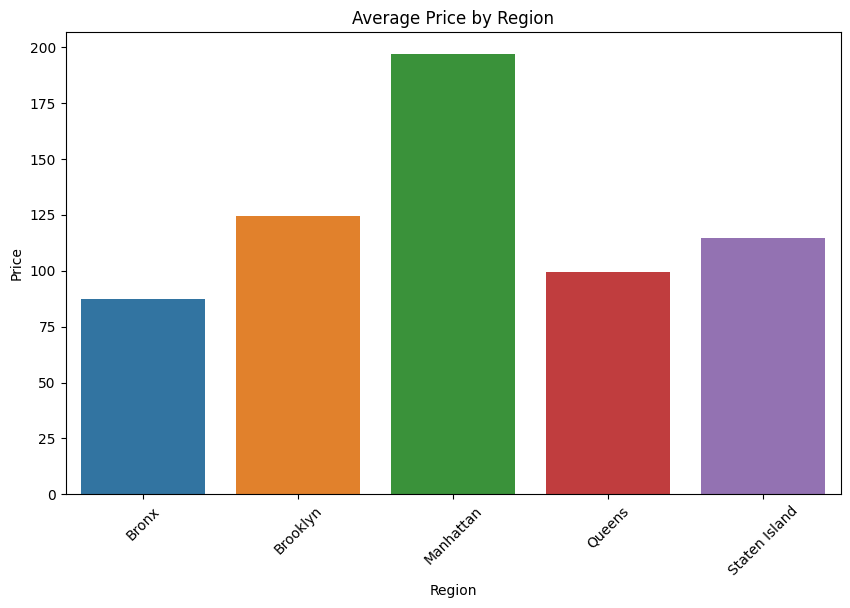

In [ ]:
# Group the data by region and calculate the average price
region_price = data_frame.groupby('region')['accomodation_price'].mean().reset_index()

# Plot the average price by Region using barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='accomodation_price', data=region_price)
plt.xlabel('Region')
plt.ylabel('Price')
plt.title('Average Price by Region')
plt.xticks(rotation=45)
plt.show()



*   Manhattan region stood out with notably higher prices, indicating a strong demand for accommodations in this area. Probable reasons could be because of the fact that Manhattan has been described as the cultural, financial, media, and entertainment capital of the world, and hosts the United Nations headquarters.
*   The Bronx, compared to other boroughs in NYC, is less popular or less tourist-oriented and also less commercial development compared to other parts of the city which caused for less demand


4.Analyzing Price based on accomodation type

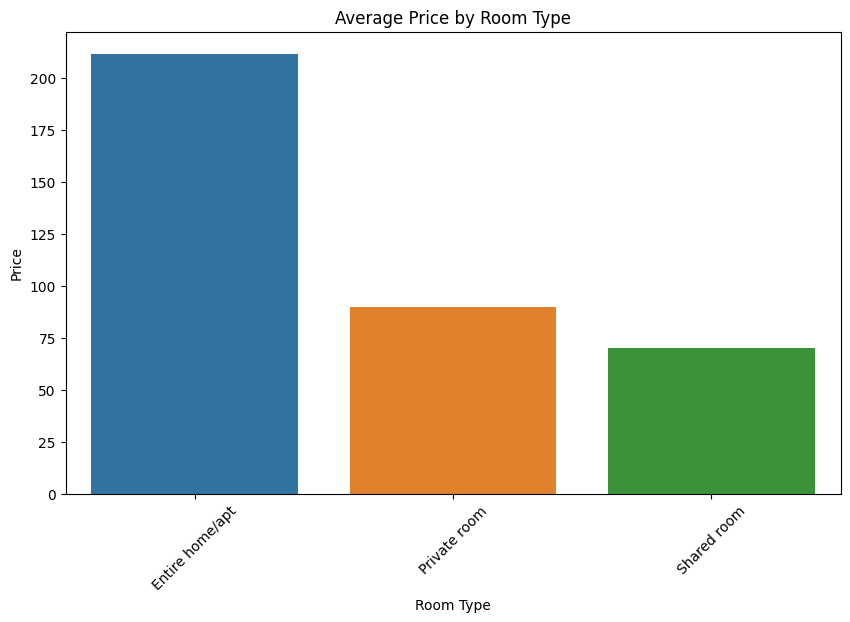

In [ ]:
# Group the data by room type and calculate the average price using barplot
room_type_price = data_frame.groupby('accommodation_type')['accomodation_price'].mean().reset_index()

# Plot the average price by room type barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodation_type', y='accomodation_price', data=room_type_price)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Average Price by Room Type')
plt.xticks(rotation=45)
plt.show()




*   The higher pricing of "Entire home/apt" suggests that guests are willing to pay a premium for the privacy, exclusivity, and additional amenities provided by having an entire home or apartment to themselves. This indicates a preference for more independent and spacious accommodations.
*   The lower pricing of "Shared room" listings indicates their popularity among budget-conscious travelers. This inference is based on the understanding that shared rooms offer a more economical option for those who prioritize cost savings over privacy or space.



5.Identify Mean Mode S.D and Range of the target variable

In [ ]:
import statistics
# Calculate the mean
mean_price = np.mean(data_frame['accomodation_price'])
# Calculate the mode
mode_price = statistics.mode(data_frame['accomodation_price'])
# Calculate the standard deviation
sd_price = np.std(data_frame['accomodation_price'])
# Calculate the range
price_range = np.ptp(data_frame['accomodation_price'])

# Print the results
print("Mean Price:", mean_price)
print("Mode Price:", mode_price)
print("Standard Deviation (SD) of Price:", sd_price)
print("Range of Price:", price_range)


Mean Price: 152.75505277800508
Mode Price: 100
Standard Deviation (SD) of Price: 240.16780356407202
Range of Price: 9990


6.Distribution of Accomodation types using Pie chart

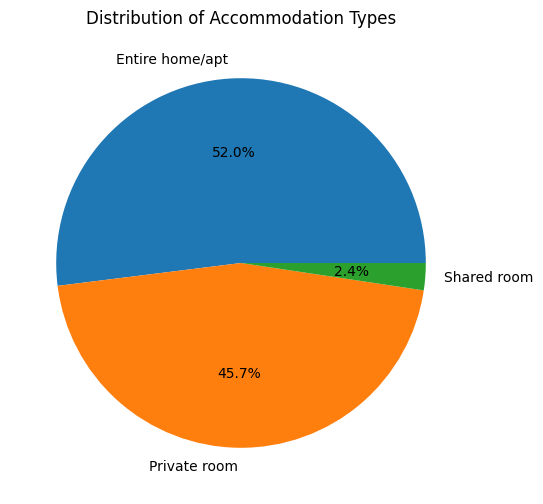

In [ ]:
import matplotlib.pyplot as plt

# Group the data by accommodation type and calculate the count
accommodation_counts = data_frame['accommodation_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(accommodation_counts, labels=accommodation_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Accommodation Types')
plt.show()




*   Majority of guests prefer to stay in entire apartments because of the fact that the significant portion of users favors having an entire space to themselves during their stay. This preference can be attributed to factors such as privacy, independence, and the ability to utilize the entire space without sharing with others.
*   Private Rooms as the Second Most Preferred. which suggests that some guests are comfortable sharing common areas while still having their own private space.

*   Shared rooms are the least preferred option among guests which indicates a smaller segment of users who are willing to share living spaces with others.





7.Region distribution using scatterplot

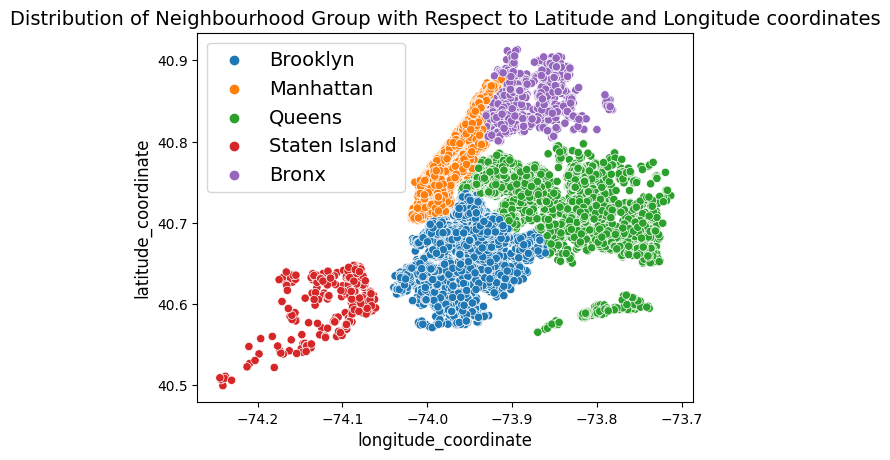

In [ ]:
plt.figure(facecolor='#FFFFFF')
sns.scatterplot(data=data_frame, x='longitude_coordinate', y='latitude_coordinate', hue='region')
plt.ylabel('latitude_coordinate', fontsize=12)
plt.xlabel('longitude_coordinate', fontsize=12)
plt.title('Distribution of Neighbourhood Group with Respect to Latitude and Longitude coordinates', fontsize=14)
plt.legend(prop={'size':14})



*   Distribution of  listings in Brooklyn is more dispersed compared to other regions which suggests a greater variation and diversity in the number and types of postings across different areas of Brooklyn.The dispersion indicates that accommodations are spread out geographically, providing guests with a wider range of options
*   The less dispersed distribution of listings in Manhattan can be attributed to the borough's high demand and desirability among tourists and travelers. Manhattan is home to many iconic landmarks, attractions, and business districts, making it a prime location for visitors.



8.Finding Top 10 neighbourhood areas



Text(0.5, 1.0, 'Top 10 Neighbourhood areas')

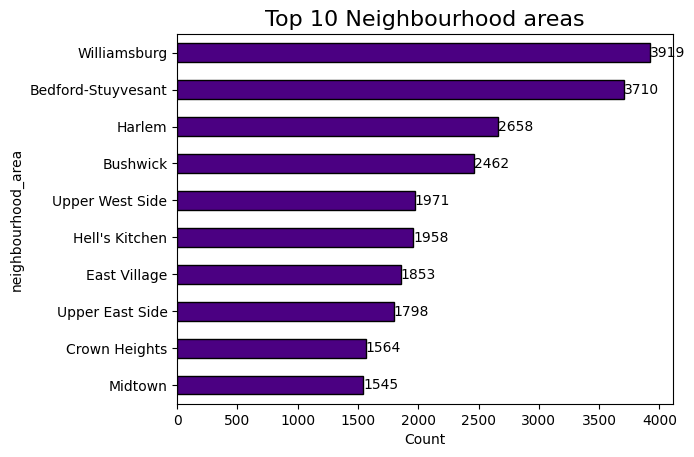

In [ ]:
plt.figure(facecolor='#FFFFFF')
ax = plt.axes()
data_frame["neighbourhood_area"].value_counts().head(10).sort_values().plot(kind = "barh",color = "indigo",edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10)
plt.xlabel("Count", size = 10)
plt.ylabel("neighbourhood_area", size = 10)
plt.title("Top 10 Neighbourhood areas", size = 16)



*   Popular Neighborhoods:  Williamsburg and Bedford-Stuyvesant are the top two neighborhoods with the highest number of listings.These neighborhoods are known for their vibrant culture, trendy establishments, and convenient access to amenities, making them attractive destinations for visitors.
*   There is a noticeable drop in the number of listings after the top two neighborhoods, with Midtown having the fewest number of listings among the top 10.
*   Beyond the top two neighborhoods, the number of listings gradually decreases, albeit at a slower rate, for the remaining neighborhoods. This indicates a diminishing trend in popularity and demand as we move down the list.





9.Top 10 Neighbourhood areas by Highest Average Price

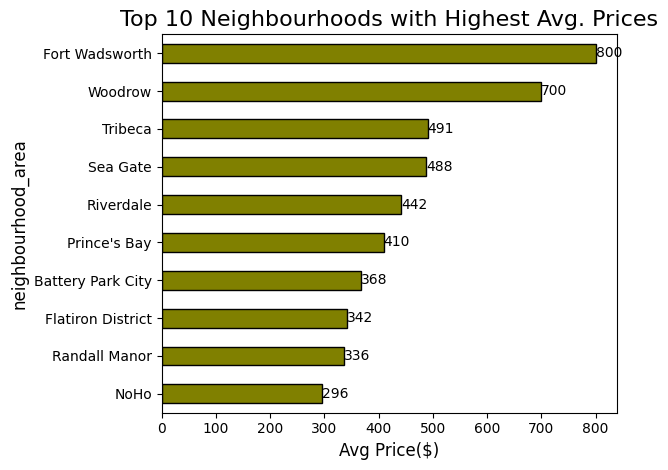

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FFFFFF')
ax = fig.add_subplot()
top_10_n_p_mean_df = data_frame.groupby("neighbourhood_area")["accomodation_price"].mean().nlargest(10)
top_10_n_p_mean_df.sort_values().plot(kind="barh", color="olive", edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10)
plt.xlabel("Avg Price($)", size=12)
plt.ylabel("neighbourhood_area", size=12)
plt.title("Top 10 Neighbourhoods with Highest Avg. Prices", size=16)
plt.tight_layout()

plt.show()


10.Frequency of the listing names using wordcloud

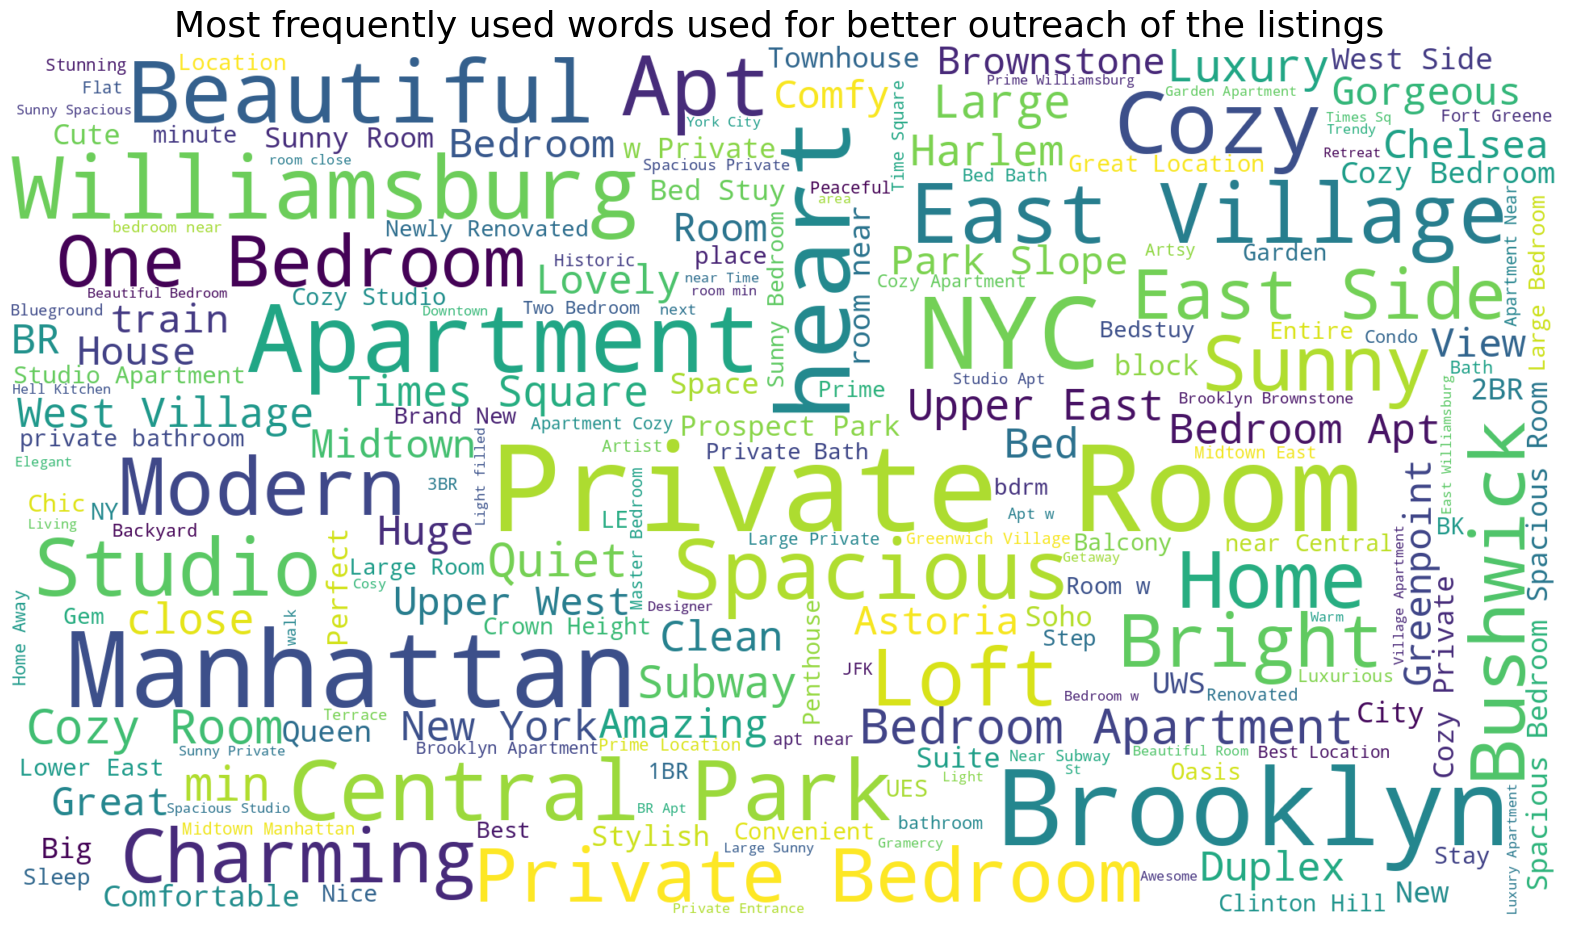

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.subplots(figsize=(20,20))
wordcloud = WordCloud(max_font_size=150,max_words=200, background_color="white",height=1080, width=1920).generate(" ".join(data_frame["listing_title"]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most frequently used words used for better outreach of the listings ", size=26)
plt.show()



*   Demand for **Private Room Accommodations**: The presence of "Private Room" as one of the most commonly searched phrases indicates a strong demand for accommodations offering private rooms. This suggests that many users prefer having their own personal space while staying in Airbnb rentals.


*   Focus on **Manhattan and Brooklyn**: The frequent appearance of "Manhattan," "Brooklyn," and "Williamsburg" in the search phrases reflects a high interest in these specific locations. This implies that potential visitors are particularly interested in finding accommodations in these popular areas of New York City.



11.Number of listings each host has (Top 20) : using groupby

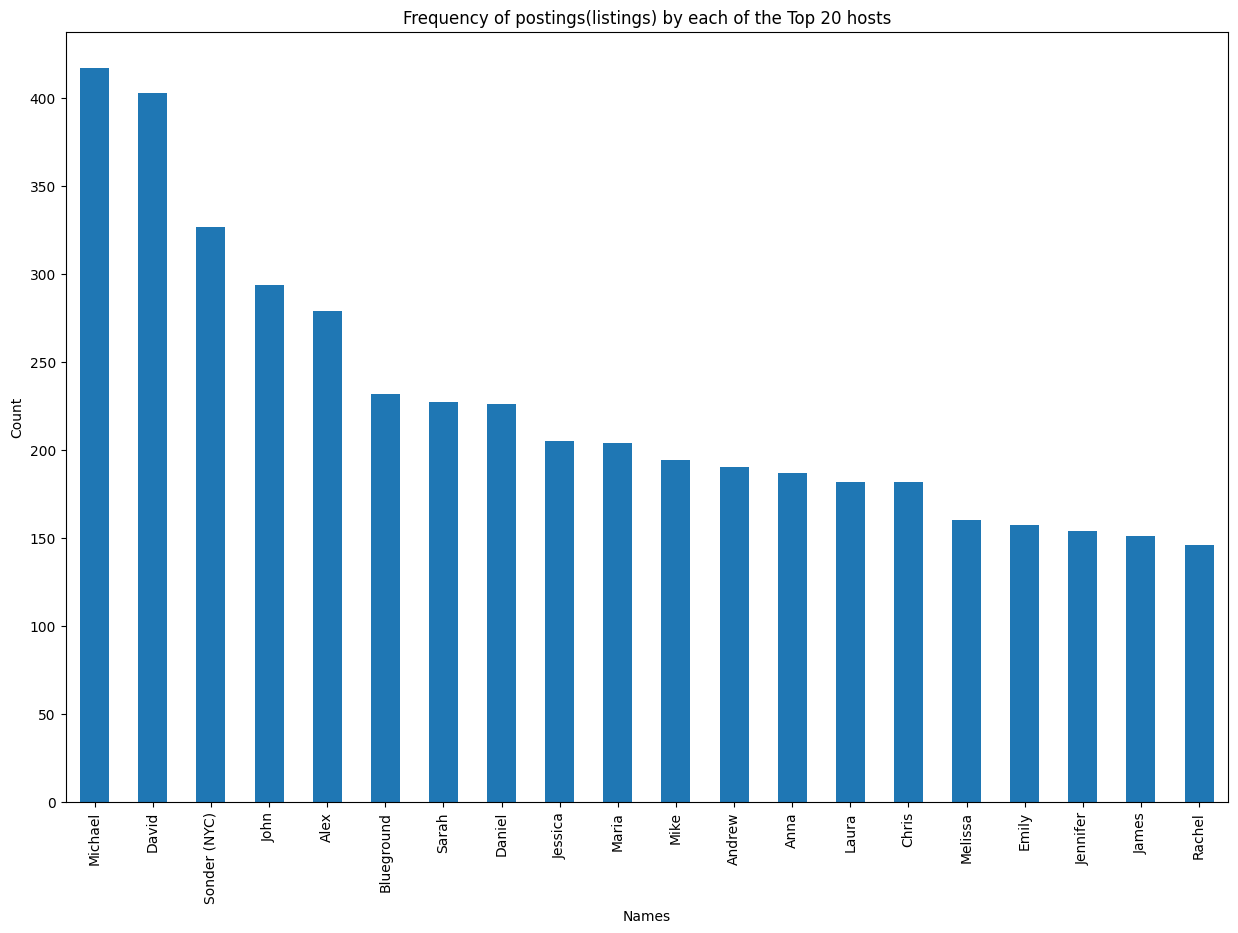

In [ ]:
plt.figure(figsize=(15,10))
name = data_frame.groupby("host_full_name")
name.size().sort_values(ascending=False)[:20].plot.bar()
plt.xlabel("Names")
plt.ylabel("Count")
plt.title("Frequency of postings(listings) by each of the Top 20 hosts")
plt.show()

12. Comparision of reviews of the regions with the average review

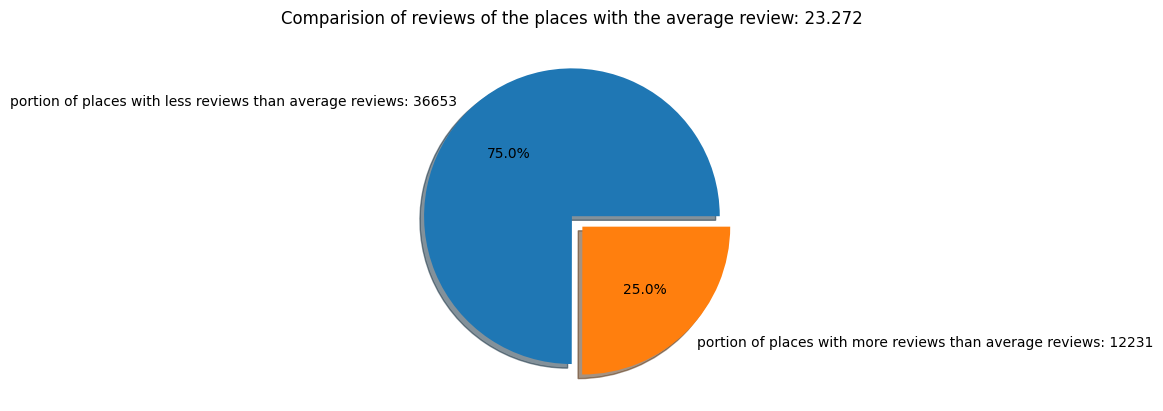

In [ ]:

less_reviews_count = len(data_frame[data_frame['total_reviews'] < np.mean(data_frame['total_reviews'].values)])
more_reviews_count = len(data_frame[data_frame['total_reviews'] > np.mean(data_frame['total_reviews'].values)])

total_count = len(data_frame)
less_reviews_percentage = less_reviews_count / total_count * 100
more_reviews_percentage = more_reviews_count / total_count * 100

labels = [
    f"portion of places with less reviews than average reviews: {less_reviews_count}",
    f"portion of places with more reviews than average reviews: {more_reviews_count}"
]
values = [less_reviews_percentage, more_reviews_percentage]
explode = [0, 0.1]
plt.title(f"Comparision of reviews of the places with the average review: {round(np.mean(data_frame['total_reviews'].values),3)}")
plt.pie(values, labels=labels, autopct='%.1f%%', explode=explode, shadow=True)
plt.show()




*  *majority* of listings received review scores *below the average review*score. This indicates that there is room for improvement in providing exceptional guest experiences, as the majority of hosts did not meet or exceed the average review score.
*   Approximately a *quarter of the listings* have received review scores *higher than the average.* This suggests that there are listings that excel in providing exceptional guest experiences and have successfully exceeded the average review score.



13.Deleting Columns thst are not useful in data modelling

In [ ]:
#Deleting the columns containing names as they are not useful in data modelling (listing_title,host_full_name,neighbourhood_area)
data_frame=data_frame.drop(columns=['listing_id','listing_title','host_id','host_full_name','latest_review_date'],axis=1)
print("Number of rows present in the dataset is {0}".format(data_frame.shape[0]))
print("Number of columns or features present in the dataset is {0}".format(data_frame.shape[1]))

Number of rows present in the dataset is 48895
Number of columns or features present in the dataset is 11


# Machine Learning Algorithms

Preprocessing the data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

In [ ]:
# Applying log transformation to the price column to handle the outliers present in it
data_frame["accomodation_price"] = np.log1p(data_frame["accomodation_price"])
#Converting the categorical columns to numeric by one hot encoding
Encoded_data=pd.get_dummies(data_frame,drop_first=True)
Encoded_data.shape

(48884, 234)

In [ ]:
np.random.shuffle(Encoded_data.values)
Y_target =Encoded_data['accomodation_price']
X_data = Encoded_data.drop("accomodation_price",axis ='columns')

#splitting the dataset as 80% training dataset,20% testing dataset
X_train=X_data.iloc[:int(0.8*X_data.shape[0]),:].values
X_test=X_data.iloc[int(0.8*X_data.shape[0]):,:].values
print("The shape of X_train dataset is {0}".format(X_train.shape))
print("The shape of X_test dataset is {0}".format(X_test.shape))

Y_train=Y_target.iloc[:int(0.8*Y_target.shape[0])].values
Y_test=Y_target.iloc[int(0.8*Y_target.shape[0]):].values
print("The shape of Y_train dataset is {0}".format(Y_train.shape))
print("The shape of Y_test dataset is {0}".format(Y_test.shape))


The shape of X_train dataset is (39107, 233)
The shape of X_test dataset is (9777, 233)
The shape of Y_train dataset is (39107,)
The shape of Y_test dataset is (9777,)


**1.Linear Regression**

In [ ]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_lr=regr.predict(X_test)
print(" Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_lr)))
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred_lr))
print('Mean Absolute Error: %f'% mean_absolute_error(Y_test, y_pred_lr))
print('Score:',regr.score(X_test, Y_test))

 Root Mean squared error: 0.50
Coefficient of determination: 0.57
Mean Absolute Error: 0.360559
Score: 0.5675201582509843


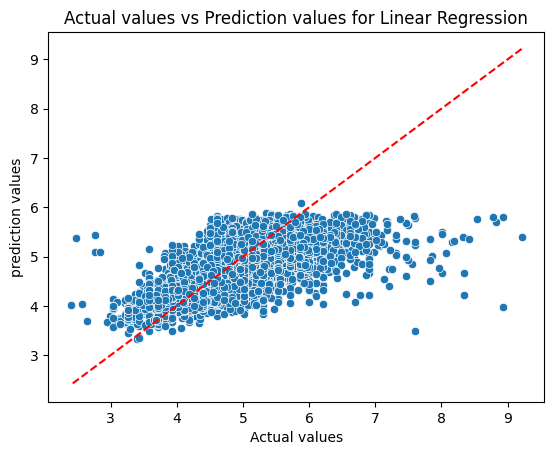

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred_lr)
q1=max(y_pred_lr.max(),Y_test.max())
q2=min(y_pred_lr.min(),Y_test.min())
plt.plot([q1,q2],[q1,q2], 'r--')
plt.title('Actual values vs Prediction values for Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('prediction values')
plt.show()

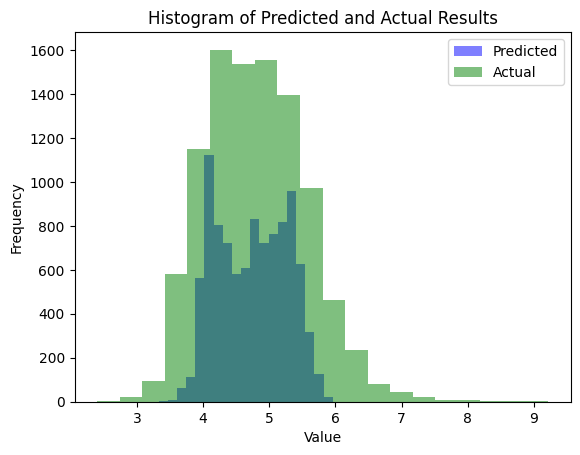

In [ ]:
plt.hist(y_pred_lr, bins=20, color='blue', alpha=0.5, label='Predicted')
plt.hist(Y_test, bins=20, color='green', alpha=0.5, label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted and Actual Results')
plt.legend()
plt.show()

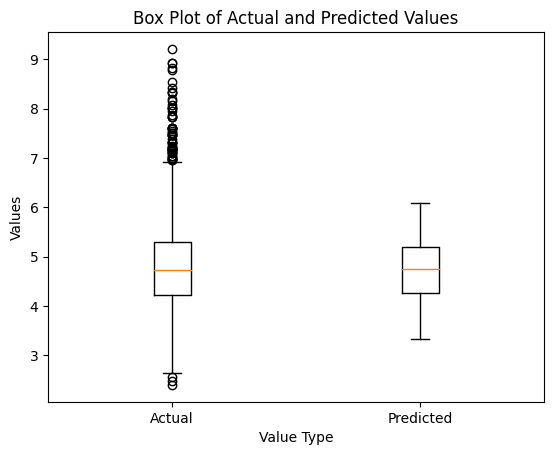

In [ ]:
data = [Y_test, y_pred_lr]
plt.boxplot(data, labels=['Actual', 'Predicted'])
plt.xlabel('Value Type')
plt.ylabel('Values')
plt.title('Box Plot of Actual and Predicted Values')
plt.show()

**2.Random Forest Regression**

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
y_pred_rf= rfr.predict(X_test)
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_rf)))
print('Mean Absolute Error: %f'% mean_absolute_error(Y_test, y_pred_rf))
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred_rf))


Root Mean squared error: 0.52
Mean Absolute Error: 0.383842
Coefficient of determination: 0.53


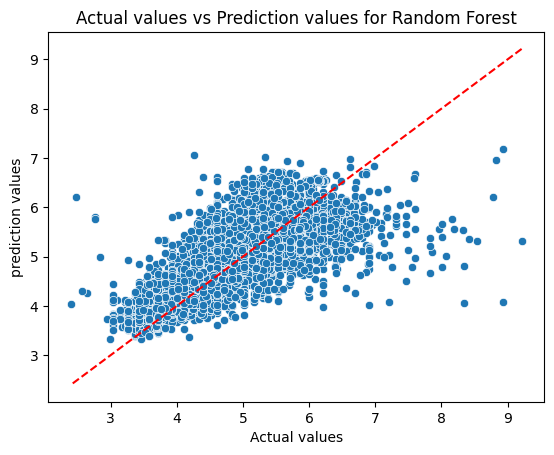

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred_rf)
q1=max(y_pred_rf.max(),Y_test.max())
q2=min(y_pred_rf.min(),Y_test.min())
plt.plot([q1,q2],[q1,q2], 'r--')
plt.title('Actual values vs Prediction values for Random Forest')
plt.xlabel('Actual values')
plt.ylabel('prediction values')
plt.show()

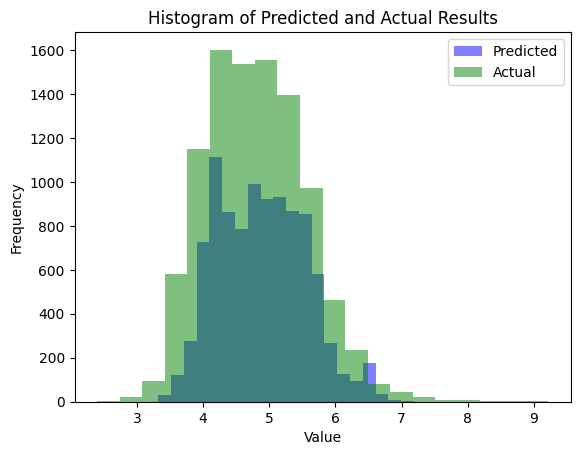

In [ ]:
plt.hist(y_pred_rf, bins=20, color='blue', alpha=0.5, label='Predicted')
plt.hist(Y_test, bins=20, color='green', alpha=0.5, label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted and Actual Results')
plt.legend()
plt.show()

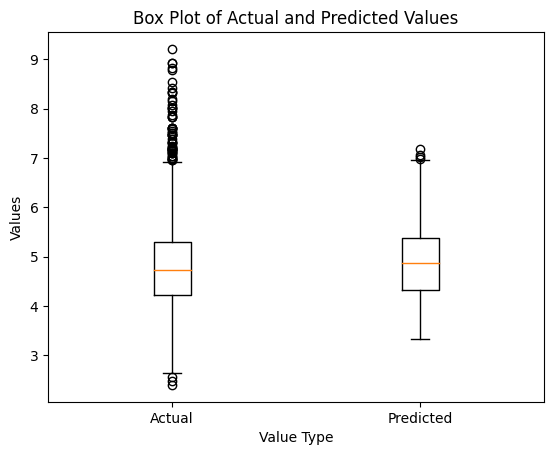

In [ ]:
data = [Y_test, y_pred_rf]
plt.boxplot(data, labels=['Actual', 'Predicted'])
plt.xlabel('Value Type')
plt.ylabel('Values')
plt.title('Box Plot of Actual and Predicted Values')
plt.show()

**3.Ridge Regression**

In [ ]:
rid_model=Ridge()
rid_model.fit(X_train,Y_train)
y_pred_ridge = rid_model.predict(X_test)
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_ridge)))
print('Mean Absolute Error: %f'% mean_absolute_error(Y_test, y_pred_ridge))
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred_ridge))

Root Mean squared error: 0.50
Mean Absolute Error: 0.360611
Coefficient of determination: 0.57


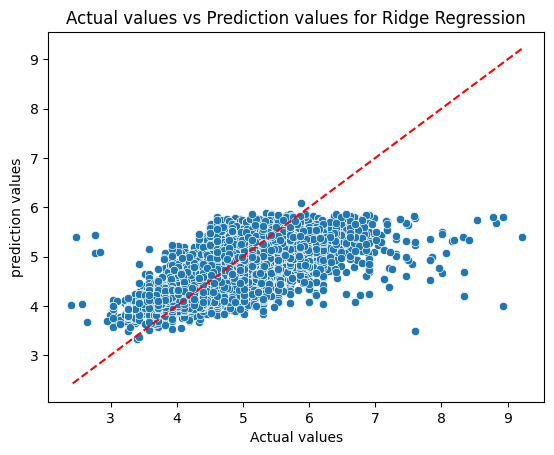

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred_ridge)
q1=max(y_pred_ridge.max(),Y_test.max())
q2=min(y_pred_ridge.min(),Y_test.min())
plt.plot([q1,q2],[q1,q2], 'r--')
plt.title('Actual values vs Prediction values for Ridge Regression')
plt.xlabel('Actual values')
plt.ylabel('prediction values')
plt.show()

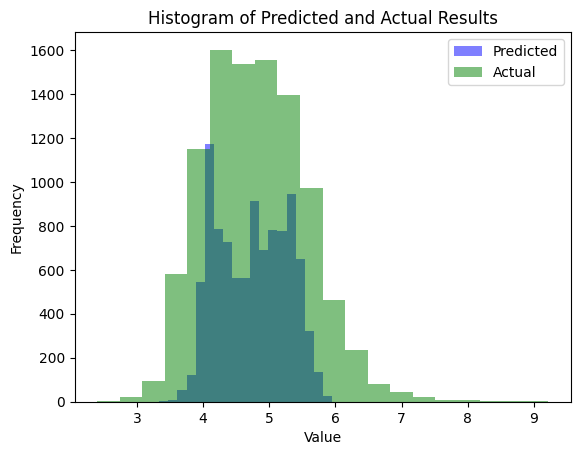

In [ ]:
plt.hist(y_pred_ridge, bins=20, color='blue', alpha=0.5, label='Predicted')
plt.hist(Y_test, bins=20, color='green', alpha=0.5, label='Actual')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted and Actual Results')
plt.legend()
plt.show()

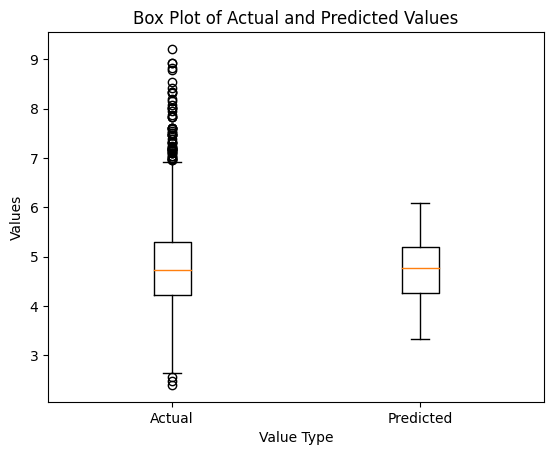

In [ ]:
data = [Y_test, y_pred_ridge]
plt.boxplot(data, labels=['Actual', 'Predicted'])
plt.xlabel('Value Type')
plt.ylabel('Values')
plt.title('Box Plot of Actual and Predicted Values')
plt.show()

**4.Decision Tree Regressor**

In [ ]:
Dtr = DecisionTreeRegressor()
Dtr.fit(X_train, Y_train)
y_pred_dtr= Dtr.predict(X_test)
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_dtr)))
print('Mean Absolute Error: %f'% mean_absolute_error(Y_test, y_pred_dtr))
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred_dtr))

Root Mean squared error: 0.72
Mean Absolute Error: 0.520966
Coefficient of determination: 0.11


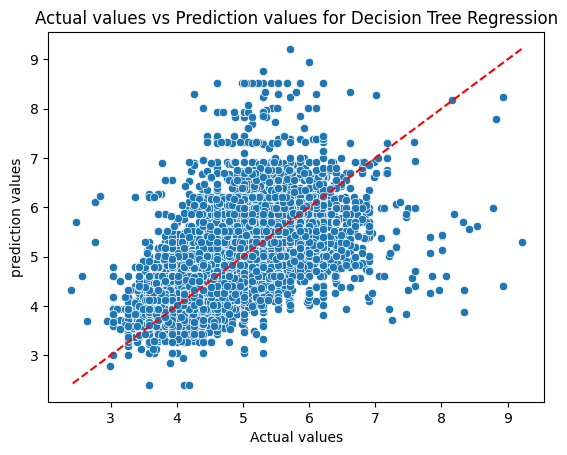

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred_dtr)
q1=max(y_pred_dtr.max(),Y_test.max())
q2=min(y_pred_dtr.min(),Y_test.min())
plt.plot([q1,q2],[q1,q2], 'r--')
plt.title('Actual values vs Prediction values for Decision Tree Regression')
plt.xlabel('Actual values')
plt.ylabel('prediction values')
plt.show()

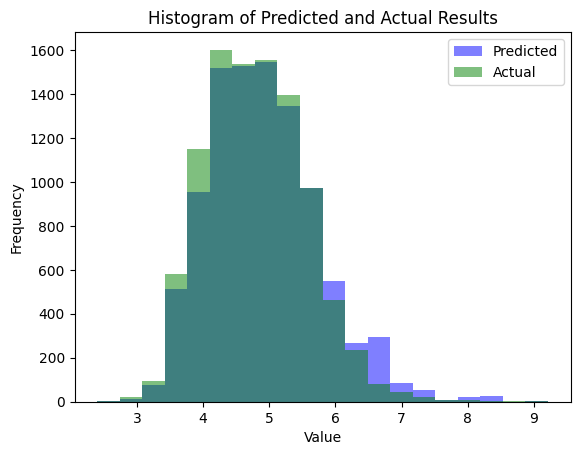

In [ ]:
plt.hist(y_pred_dtr, bins=20, color='blue', alpha=0.5, label='Predicted')
plt.hist(Y_test, bins=20, color='green', alpha=0.5, label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted and Actual Results')
plt.legend()
plt.show()

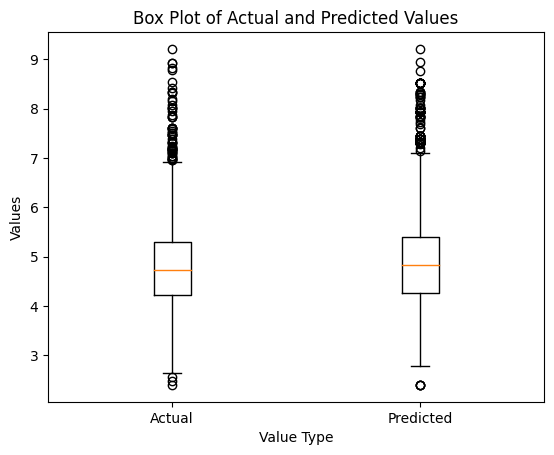

In [ ]:
data = [Y_test, y_pred_dtr]

plt.boxplot(data, labels=['Actual', 'Predicted'])
plt.xlabel('Value Type')
plt.ylabel('Values')
plt.title('Box Plot of Actual and Predicted Values')
plt.show()

**5.K-NN regressor**

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_knn)))
print('Mean Absolute Error: %f'% mean_absolute_error(Y_test, y_pred_knn))
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred_knn))

Root Mean squared error: 0.74
Mean Absolute Error: 0.565984
Coefficient of determination: 0.06


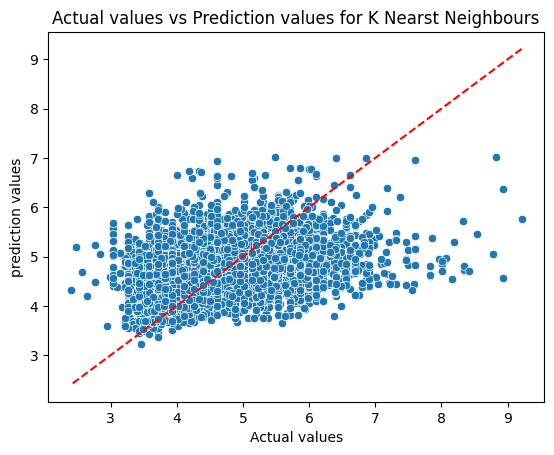

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred_knn)
q1=max(y_pred_knn.max(),Y_test.max())
q2=min(y_pred_knn.min(),Y_test.min())
plt.plot([q1,q2],[q1,q2], 'r--')
plt.title('Actual values vs Prediction values for K Nearst Neighbours')
plt.xlabel('Actual values')
plt.ylabel('prediction values')
plt.show()

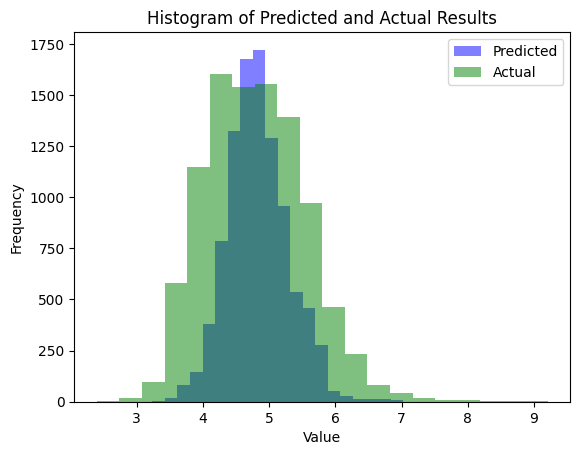

In [ ]:
plt.hist(y_pred_knn, bins=20, color='blue', alpha=0.5, label='Predicted')
plt.hist(Y_test, bins=20, color='green', alpha=0.5, label='Actual')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted and Actual Results')
plt.legend()
plt.show()

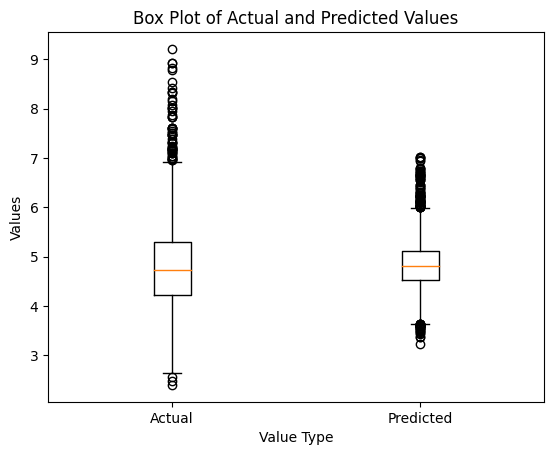

In [ ]:
data = [Y_test, y_pred_knn]
plt.boxplot(data, labels=['Actual', 'Predicted'])
plt.xlabel('Value Type')
plt.ylabel('Values')
plt.title('Box Plot of Actual and Predicted Values')
plt.show()

**References:**


*   Numpy - https://numpy.org/doc/stable/
*   Pandas - https://pandas.pydata.org/docs/user_guide/index.html
*   Matplotlib - https://matplotlib.org/stable/users/index
*   Seaborn - https://seaborn.pydata.org/api.html
*   sklearn - https://scikit-learn.org/stable/







